In [118]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

In [41]:
df=pd.read_csv("List of Countries by Sugarcane Production.csv")

In [42]:
df.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768.678.382,"3.668,531",10.226.205,"75.167,5"
1,1,India,Asia,348.448.000,260721,4.950.000,"70.393,5"
2,2,China,Asia,123.059.739,88287,1.675.215,"73.459,1"
3,3,Thailand,Asia,87.468.496,"1.264,303",1.336.575,"65.442,2"
4,4,Pakistan,Asia,65.450.704,324219,1.130.820,57.879


In [43]:
df.shape

(103, 7)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Unnamed: 0                  103 non-null    int64 
 1   Country                     103 non-null    object
 2   Continent                   103 non-null    object
 3   Production (Tons)           103 non-null    object
 4   Production per Person (Kg)  103 non-null    object
 5   Acreage (Hectare)           102 non-null    object
 6   Yield (Kg / Hectare)        102 non-null    object
dtypes: int64(1), object(6)
memory usage: 5.8+ KB


## Data Cleaning

In [46]:
df["Production (Tons)"]=df["Production (Tons)"].str.replace(".","")
df["Production per Person (Kg)"]=df["Production per Person (Kg)"].str.replace(".","").str.replace(",",".")
df["Acreage (Hectare)"]=df["Acreage (Hectare)"].str.replace(".","")
df["Yield (Kg / Hectare)"]=df["Yield (Kg / Hectare)"].str.replace(".","").str.replace(",",".")

In [47]:
df.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768678382,3668531,10226205,751675
1,1,India,Asia,348448000,260721,4950000,703935
2,2,China,Asia,123059739,88287,1675215,734591
3,3,Thailand,Asia,87468496,1264303,1336575,654422
4,4,Pakistan,Asia,65450704,324219,1130820,57879


In [48]:
df.rename(columns={"Production (Tons)":"Production(Tons)"},inplace=True)
df.rename(columns={"Production per Person (Kg)":"Production_per_Person(Kg)"},inplace=True)
df.rename(columns={"Acreage (Hectare)":"Acreage(Hectare)"},inplace=True)
df.rename(columns={"Yield (Kg / Hectare)":"Yield(Kg/Hectare)"},inplace=True)

In [49]:
df.head()

,Unnamed: 0,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,0,Brazil,South America,768678382,3668531,10226205,751675
1,1,India,Asia,348448000,260721,4950000,703935
2,2,China,Asia,123059739,88287,1675215,734591
3,3,Thailand,Asia,87468496,1264303,1336575,654422
4,4,Pakistan,Asia,65450704,324219,1130820,57879


In [50]:
df.isna().sum()

Unnamed: 0                   0
Country                      0
Continent                    0
Production(Tons)             0
Production_per_Person(Kg)    0
Acreage(Hectare)             1
Yield(Kg/Hectare)            1
dtype: int64

In [51]:
df[df["Acreage(Hectare)"].isna()]

,Unnamed: 0,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
99,99,Djibouti,Africa,53,51,NaN,NaN


In [52]:
df=df.dropna().reset_index()

In [53]:
df

,index,Unnamed: 0,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,0,0,Brazil,South America,768678382,3668531,10226205,751675
1,1,1,India,Asia,348448000,260721,4950000,703935
2,2,2,China,Asia,123059739,88287,1675215,734591
3,3,3,Thailand,Asia,87468496,1264303,1336575,654422
4,4,4,Pakistan,Asia,65450704,324219,1130820,57879
...,...,...,...,...,...,...,...,...
97,97,97,Spain,Europe,394,8,9,435965
98,98,98,Lebanon,Asia,97,16,3,283864
99,100,100,Singapore,Asia,50,9,2,25
100,101,101,Samoa,Oceania,12,6,1,119498


In [54]:
df.drop(["index","Unnamed: 0"],axis=1,inplace=True)

In [55]:
df.head()

,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382,3668531,10226205,751675
1,India,Asia,348448000,260721,4950000,703935
2,China,Asia,123059739,88287,1675215,734591
3,Thailand,Asia,87468496,1264303,1336575,654422
4,Pakistan,Asia,65450704,324219,1130820,57879


In [56]:
df.dtypes

Country                      object
Continent                    object
Production(Tons)             object
Production_per_Person(Kg)    object
Acreage(Hectare)             object
Yield(Kg/Hectare)            object
dtype: object

In [57]:
df["Production(Tons)"]=df["Production(Tons)"].astype("float")
df["Production_per_Person(Kg)"]=df["Production_per_Person(Kg)"].astype("float")
df["Acreage(Hectare)"]=df["Acreage(Hectare)"].astype("float")
df["Yield(Kg/Hectare)"]=df["Yield(Kg/Hectare)"].astype("float")


In [58]:
df.dtypes

Country                       object
Continent                     object
Production(Tons)             float64
Production_per_Person(Kg)    float64
Acreage(Hectare)             float64
Yield(Kg/Hectare)            float64
dtype: object

In [59]:
df.nunique()

Country                      102
Continent                      6
Production(Tons)             102
Production_per_Person(Kg)    101
Acreage(Hectare)             101
Yield(Kg/Hectare)            102
dtype: int64

## Univariate Analysis

In [60]:
df.head()

,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382.0,3668531.0,10226205.0,751675.0
1,India,Asia,348448000.0,260721.0,4950000.0,703935.0
2,China,Asia,123059739.0,88287.0,1675215.0,734591.0
3,Thailand,Asia,87468496.0,1264303.0,1336575.0,654422.0
4,Pakistan,Asia,65450704.0,324219.0,1130820.0,57879.0


### 1. How many Countries produce sugarcane from each continent?

In [61]:
df["Continent"].value_counts()

Continent
Africa           38
Asia             25
North America    22
South America    11
Oceania           4
Europe            2
Name: count, dtype: int64

<Axes: xlabel='Continent'>

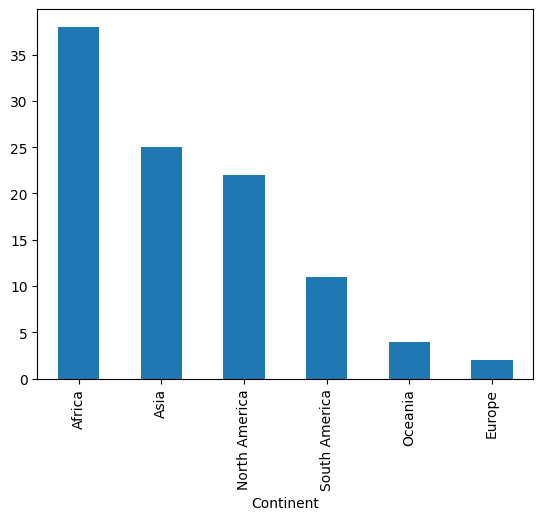

In [62]:
df["Continent"].value_counts().plot(kind="bar")

### Distribution of Columns

C:\Users\aswin\AppData\Local\Temp\ipykernel_71936\2966165919.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Production(Tons)"])
C:\Users\aswin\AppData\Local\Temp\ipykernel_71936\2966165919.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Production_per_Person(Kg)"])
C:\Users\aswi

<Axes: xlabel='Yield(Kg/Hectare)', ylabel='Density'>

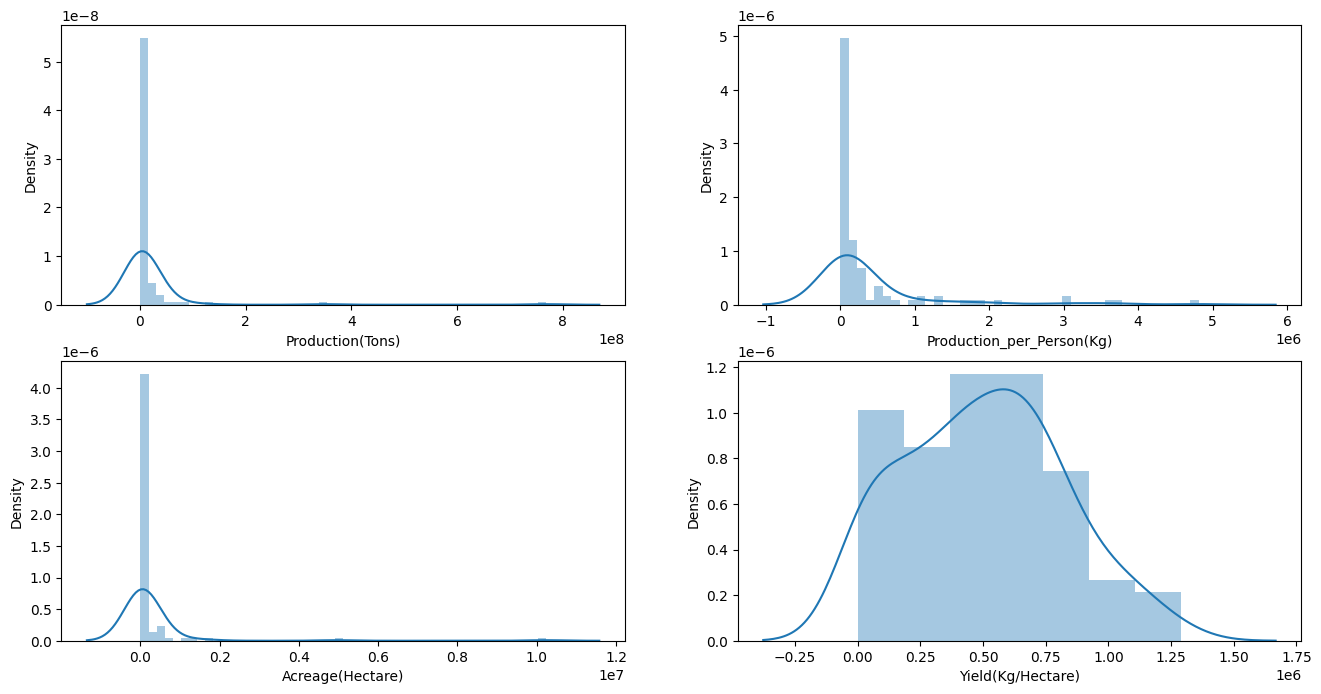

In [69]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df["Production(Tons)"])
plt.subplot(2,2,2)
sns.distplot(df["Production_per_Person(Kg)"])
plt.subplot(2,2,3)
sns.distplot(df["Acreage(Hectare)"])
plt.subplot(2,2,4)
sns.distplot(df["Yield(Kg/Hectare)"])

## Checking for outliers

In [ ]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.boxplot(df["Production(Tons)"])
plt.subplot(2,2,2)
sns.boxplot(df["Production_per_Person(Kg)"])
plt.subplot(2,2,3)
sns.boxplot(df["Acreage(Hectare)"])
plt.subplot(2,2,4)
sns.boxplot(df["Yield(Kg/Hectare)"])

In [71]:
df.describe()

,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
count,1.020000e+02,1.020000e+02,1.020000e+02,1.020000e+02
mean,1.850372e+07,4.124805e+05,2.498981e+05,5.018502e+05
std,8.419149e+07,8.669140e+05,1.137003e+06,3.169530e+05
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+01
25%,6.251875e+04,1.075225e+04,1.104000e+03,2.487505e+05
50%,1.440044e+06,8.135850e+04,1.655800e+04,5.102500e+05
75%,6.426824e+06,2.828128e+05,8.047400e+04,7.198920e+05
max,7.686784e+08,4.816299e+06,1.022620e+07,1.290493e+06


## Bivariate analysis

In [72]:
df.head()

,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382.0,3668531.0,10226205.0,751675.0
1,India,Asia,348448000.0,260721.0,4950000.0,703935.0
2,China,Asia,123059739.0,88287.0,1675215.0,734591.0
3,Thailand,Asia,87468496.0,1264303.0,1336575.0,654422.0
4,Pakistan,Asia,65450704.0,324219.0,1130820.0,57879.0


## Which Country produces maximum sugarcane?

In [169]:
df_new=df[["Country","Production(Tons)"]].set_index("Country")

In [170]:
df_new.head()

,Production(Tons)
Country,
Brazil,768678382.0
India,348448000.0
China,123059739.0
Thailand,87468496.0
Pakistan,65450704.0


In [171]:
df_new["Production(Tons)_Percentage"]=df_new["Production(Tons)"]*100/df_new["Production(Tons)"].sum()

In [172]:
df_new.head()

,Production(Tons),Production(Tons)_Percentage
Country,,
Brazil,768678382.0,40.727285
India,348448000.0,18.462001
China,123059739.0,6.520138
Thailand,87468496.0,4.634389
Pakistan,65450704.0,3.467809


<Axes: ylabel='Production(Tons)_Percentage'>

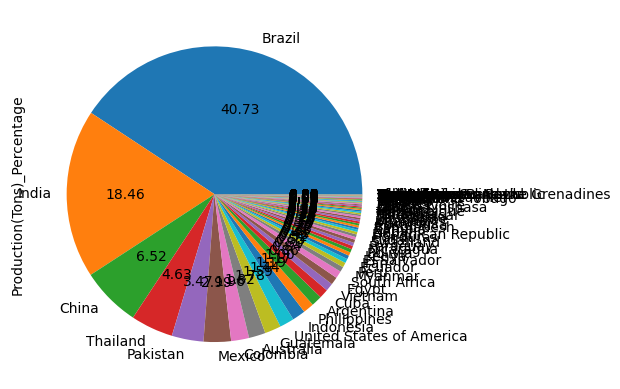

In [173]:
df_new["Production(Tons)_Percentage"].plot(kind="pie",autopct="%.2f")